# Практическая работа №3: Кластерный анализ

Выполнил студент гр. 0373 Ширяев Никита. Вариант №22

## Цель работы
Освоение основных понятий и некоторых методов кластерного анализа,
в частности, метода k-means и метода поиска сгущений.

## Основные теоретические положения

#### Метрика - $d(x, y)$, называемая функцией расстояния, причем:

1. $d(x, y) >= 0$
2. $d(x, y) = d(y, x)$
3. $d(x, y) <= d(x, z) + d(z, y)$


Евклидово расстояние: $d(x, y) = \sqrt{\sum{(x_i - y_i)^2}}$

#### Алгоритм кластеризации KMeans:

это алгоритм минимизации суммарного квадратичного отклонения от центров кластеров.
В качестве критерия используется минимальное расстояние внутри кластера относительно среднего.
В качестве метрики используется Евклидово расстояние.

Алгоритм:

1. Случайно выбираем $k$ точек - центройды
2. Относим каждый объект к кластеру
3. Пересчитываем центройды как точки на минимальном расстоянии от других в кластере.
4. Делаем предыдущие пункты пока центроиды не будут отличимы от полученных на предыдущем шаге

#### Алгоритм кластеризации KMedoids:

1. Из элементов для кластеризации случайно выбирается $k$ точек - начальных центроидов кластеров
2. Относим каждый объект к кластеру
3. Центроид каждого кластера пересчитывается как точка находящаяся на минимальном расстоянии от остальных точек кластера
4. Делаем предыдущие пункты пока центроиды не будут отличимы от полученных на предыдущем шаге

#### Метод локтя:

В ходе работы алгоитма кластеризации увеличивается количество кластеров по формуле $W_{C_j} = \sum{(x_i - x_{C_j})^2}$, где $C_j$ - множество элементов кластера, а $x_{C_j}$ - центр кластера.

При увеличении кластеров разброс тремится к 0. После представления разброса строится график, где по оси абсцисс - $k$, а по оси ординат - $W$


#### Метод поиска сгущений:

Является одним из FOREL - алгоритмов.
Разбиваем множество $X$ на кластеры, известно, что кластеры имеют радиус $R$. 

Радиус выбирается как $R_{min} < R < R_{max}$. Построим матрицу $D = \{d_{ij}\}$, где $d_{ij}$ - метрика между $i$ и $j$.

$$R_{min} = min\{d_{ij}>0\}$$
$$R_{max} = max\{d_{ij}\}$$

Алгоритм:

1. $U := X$
2. $X_c \in U$
3. Вокруг центройда создаем кластер с радиусом $R$
4. Пересчитываем новый центр = $\widetilde{x_с} := \frac{\sum{X}}{\#k}$
5. Если $X_c \neq \widetilde{x_с}$, то $X_c := \widetilde{x_с}$ и возвращаемся на пункт 3
6. $U := U\\K$
7. $K := K \cup \{X_c\}$
8. Если множество $U$ не пусто, переходим на пункт 2, иначе заканчиваем алгоритм.

#### Нормализация minmax:

Нормализация точек происходит по формуле: $X_n = \frac{X - X_{min}}{X_{max} - X_{min}}$


## Постановка задачи
Дано конечное множество из объектов, представленных двумя признаками (в качестве этого множества принимаем исходную двумерную выборку, сформированную ранее в практической работе №2). Выполнить разбиение исходного множества объектов на конечное число подмножеств
(кластеров) с использованием метода k-means и метода поиска сгущений. Полученные результаты содержательно проинтерпретировать


## Выполнение работы

In [1]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.cluster as sk
import math
import scipy as sp
from scipy.stats import norm
import plotly.express as px
import math
import sympy as syp
from numpy import linalg as LA
from sklearn_extra.cluster import KMedoids
from collections import Counter
import warnings
from scipy.spatial.distance import cdist
from matplotlib.pyplot import cm
from random import sample
import matplotlib.colors as pltc


In [2]:

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    mean = np.nanmean([np.NaN, np.NaN])
    #print(mean)

csv = pd.read_csv('top_defense_manufacturers.csv', delimiter=',')
csvY =list(csv['2020_total_revenue '])
csvY =[x.replace("$", "")  for x in csvY]
csvY =[x.replace(" ", "")  for x in csvY]
csvY =[x.replace(",", "")  for x in csvY]

csvY = np.asarray(csvY, dtype=float)
data2 = csvY.copy()
data2.sort()
#data2Print = pd.DataFrame(data2, columns=["2020_total_revenue"])

csvX =list(csv['revenue_fom_defense'])
csvX =[x.replace("%", "")  for x in csvX]
csvX = np.asarray(csvX, dtype=int)
data1 = csvX.copy()
data1.sort()
#data1Print = pd.DataFrame(data1, columns=["revenue_fom_defense"])


dataXY = np.array([[csvX[i], csvY[i]] for i in range(len(csvX))])


## Номер 1


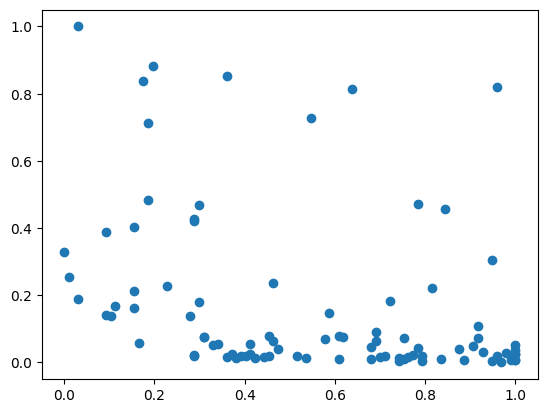

Нормализованные данные принадлежат отрезку [0, 1]


In [3]:
minimum = min(csvX)
maximum = max(csvX)
normX =  [(i-minimum)/(maximum - minimum) for i in csvX]
minimum = min(csvY)
maximum = max(csvY)
normY = [(i-minimum)/(maximum - minimum) for i in csvY]

normXY = np.array([[normX[i], normY[i]] for i in range(len(normX))])

plt.scatter(normX, normY)
plt.show()
print("Нормализованные данные принадлежат отрезку [0, 1]")

## Номер 2

In [4]:
klust = int(np.sqrt(len(csvX)/2))
print("Грубая верхняя оценка количества кластеров =", klust)

Грубая верхняя оценка количества кластеров = 6


## Номер 3

In [5]:

class Kmeans:
    
    def CMove(self, X, k, Cl_ass):
        new_centroids = np.zeros_like(self.centroids)
        for i in range(k):
            cluster = X[Cl_ass==i]
            if not len(cluster):
                continue
            new_centroids[i] = np.mean(cluster, axis = 0)
        return new_centroids
    
    
    
    def NormClusters(self, dataX2):
        #print(dataX2[0,)
        r = np.array([np.argmin(np.linalg.norm(x-self.centroids, axis = 2)) for x in dataX2])
        #print("r", r)
    
    
    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.nklusters))
        for k in range(self.nklusters):
            row_norm = LA.norm(X - centroids[k], axis=1)
            #print("row_norm", row_norm)
            distance[:, k] = np.square(row_norm)
            #print("distance", distance)
        return distance
    
    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.nklusters, X.shape[1]))
        for k in range(self.nklusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        
        return centroids
    
    
    def basics(self, datasetX, datasetXY, eps, nklusters):
        self.nklusters = nklusters
        self.iter_count = 0
        c = np.random.choice(len(datasetX), nklusters)
        #print(c)
        self.centroids =[datasetXY[i] for i in c]
        #print("centroids", self.centroids)
    

        exit = False
        while(exit==False):
            old_centroids = self.centroids
            distance = self.compute_distance(datasetXY, old_centroids)
            self.labels = np.argmin(distance, axis=1)
            self.centroids = self.compute_centroids(datasetXY, self.labels)
            #self.NormClusters([datasetX, datasetY])
            if np.all(old_centroids == self.centroids):
                break


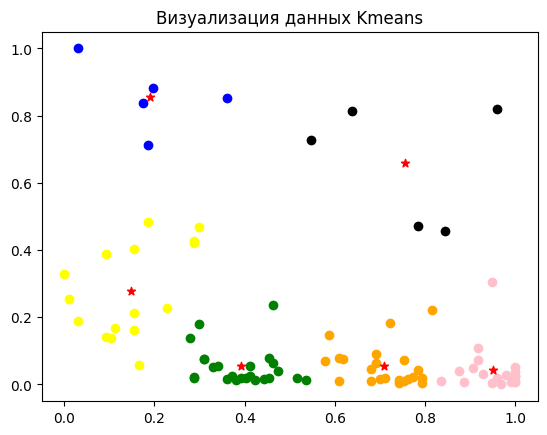

In [7]:
km = Kmeans()
km.basics(normX, normXY, 0.01, klust)
#km.basics(csvX, dataXY,  0.01, klust)
centroids = km.centroids

colors = ['black', 'yellow', 'blue', 'orange', 'pink', 'green']

def PrintData(datasetXY, labels, centers, colorsSet):
    for i in range(len(labels)):
        plt.scatter(normX[i], normY[i], c=colorsSet[labels[i]])
    plt.scatter(centers[:, 0], centers[:, 1], marker = '*', c='r')
    plt.title('Визуализация данных Kmeans')
    plt.show()
    
PrintData(dataXY, km.labels, centroids, colors)

Каждый кластер - свой цвет, центройды обозначены красной звездой.

## Номер 4

In [8]:

class Kmedoids:
    
    def CMovem(self, X, k, Cl_ass):
        new_centroids = np.zeros_like(self.centroids)
        for i in range(k):
            cluster = X[Cl_ass==i]
            if not len(cluster):
                continue
            new_centroids[i] = np.mean(cluster, axis = 0)
        return new_centroids
    
    
    
    def NormClustersM(self, dataX2):
        #print(dataX2[0,)
        r = np.array([np.argmin(np.linalg.norm(x-self.centroids, axis = 2)) for x in dataX2])
        #print("r", r)
    
    
    def compute_distanceM(self, X, centroids):
        distance = np.zeros((X.shape[0], self.nklusters))
        for k in range(self.nklusters):
            row_norm = LA.norm(X - centroids[k], axis=1)
            #print("row_norm", row_norm)
            distance[:, k] = np.square(row_norm)
            #print("distance", distance)
        return distance
    
    def compute_centroidsM(self, X, labels):
        centroids = np.zeros((self.nklusters, X.shape[1]))
        for k in range(self.nklusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        
        return centroids
    
    
    def basicsM(self, datasetX, datasetXY, nklusters):
        self.nklusters = nklusters
        self.iter_count = 0
        #c = np.random.choice(len(datasetX), nklusters)
        #print(c)
        kmedoids = KMedoids(n_clusters=nklusters, random_state=0).fit(datasetXY)
        self.centroids =kmedoids.cluster_centers_ #[datasetXY[i] for i in c]
        #print("centroids", self.centroids)
    
        old_centroids = self.centroids
        distance = self.compute_distanceM(datasetXY, old_centroids)
        self.labels = np.argmin(distance, axis=1)
        minCost = sum(distance)
        
        for m in range(len(self.centroids)):
            for v in datasetXY[self.labels == m, :]:
                #print(v, self.centroids[m])
                if(v[0]!=self.centroids[m][0] and v[1]!=self.centroids[m][1]):
                    new_centroids = [v if (x==m).all() else x for x in old_centroids]
                    new_distance = self.compute_distanceM(datasetXY, old_centroids)
                    new_labels = np.argmin(distance, axis=1)
                    Cost = sum(new_distance)
                    if((Cost<minCost).all()):
                        minCost = cost
                        old_centroids = new_centroids
                        self.labels = new_labels

    



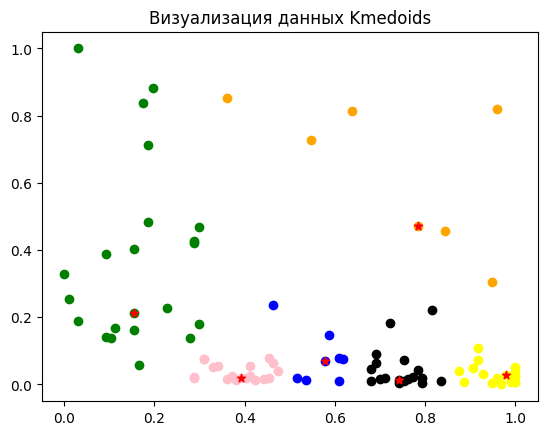

In [10]:
kmd = Kmedoids()
kmd.basicsM(normX, normXY, klust)
centroidsX = [kmd.centroids[:][i][0] for i in range(len(kmd.centroids))]
centroidsY = [kmd.centroids[:][i][1] for i in range(len(kmd.centroids))]


colors = ['black', 'yellow', 'blue', 'orange', 'pink', 'green']

def PrintDataN(datasetXY, labels, centersSetX, centersSetY, colorsSet):
    for i in range(len(labels)):
        plt.scatter(normX[i], normY[i], c=colorsSet[labels[i]])
    plt.scatter(centroidsX, centroidsY, marker = '*', c='r')
    plt.title('Визуализация данных Kmedoids')
    plt.show()
    
PrintDataN(dataXY, kmd.labels, centroidsX, centroidsY, colors)

Каждый кластер - свой цвет, центройды обозначены красной звездой.

## Номер 5

In [11]:
medoidsInfo = pd.DataFrame(columns=["k", "Центроид кластера kmeans", "Объем кластера kmeans", "Центроид кластера kmedoids", 
                                   "Объем кластера kmedoids"])

for k in range(1, klust + 1):
    km = Kmeans()
    km.basics(csvX, dataXY,  0.01, k)
    kmd = Kmedoids()
    kmd.basicsM(csvX, dataXY, k)
    
    counterMeans = Counter(km.labels)
    counterMedoids = Counter(kmd.labels)
    
    #print(counterMeans, counterMeans[0])
    for i in range(len(km.centroids)):
        medoidsInfo.loc[len(medoidsInfo)] = [k, np.round(km.centroids[i], 2), counterMeans[i], 
                                             np.round(kmd.centroids[i], 2), counterMedoids[i]]
print(medoidsInfo)

    k Центроид кластера kmeans  Объем кластера kmeans  \
0   1        [56.44, 14151.44]                     91   
1   2         [60.04, 6316.33]                     75   
2   2        [39.56, 50878.52]                     16   
3   3          [40.5, 66283.9]                      8   
4   3        [38.93, 28665.98]                     15   
5   3         [62.18, 4816.47]                     68   
6   4        [35.13, 15039.91]                     15   
7   4         [66.86, 3391.28]                     58   
8   4          [40.7, 33521.7]                     10   
9   4          [40.5, 66283.9]                      8   
10  5        [39.29, 20886.36]                      7   
11  5        [38.62, 35473.14]                      8   
12  5          [40.5, 66283.9]                      8   
13  5         [35.0, 13082.61]                     10   
14  5         [66.86, 3391.28]                     58   
15  6          [40.7, 33521.7]                     10   
16  6        [31.07, 15445.55] 

## Номер 6

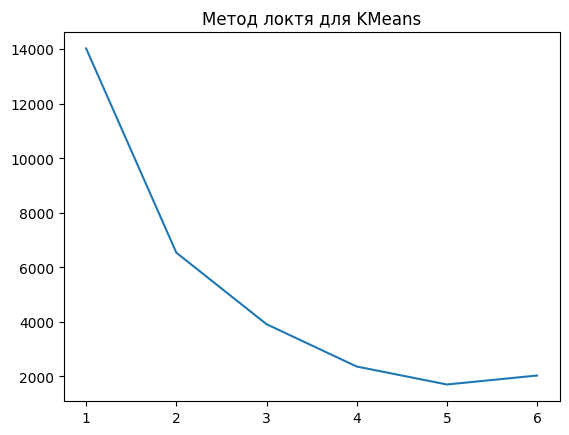

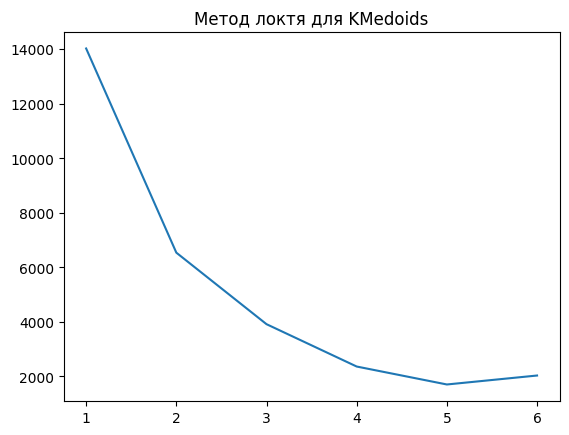

In [12]:
kaxis = np.arange(1, 7)
distortionsMean = []
distortionsMedoid = []


for k in range(1, klust + 1):
    km = Kmeans()
    km.basics(csvX, dataXY,  0.01, k)
    kmd = Kmedoids()
    kmd.basicsM(csvX, dataXY, k)
    
    counterMeans = Counter(km.labels)
    counterMedoids = Counter(kmd.labels)
    
    distortionsMean.append( sum(np.min(cdist(dataXY, km.centroids, 'euclidean' ), axis = 1 )) / dataXY.shape[0])
    distortionsMedoid.append( sum(np.min(cdist(dataXY, kmd.centroids, 'euclidean' ), axis = 1 )) / dataXY.shape[0])

    
    
plt.plot(kaxis, distortionsMean)
plt.title("Метод локтя для KMeans")
plt.show()

plt.plot(kaxis, distortionsMean)
plt.title("Метод локтя для KMedoids")
plt.show()

По методу локтя можно увидеть, что опускаясь, график меняет направление для Kmeans и Kmedoids при $k = 5$

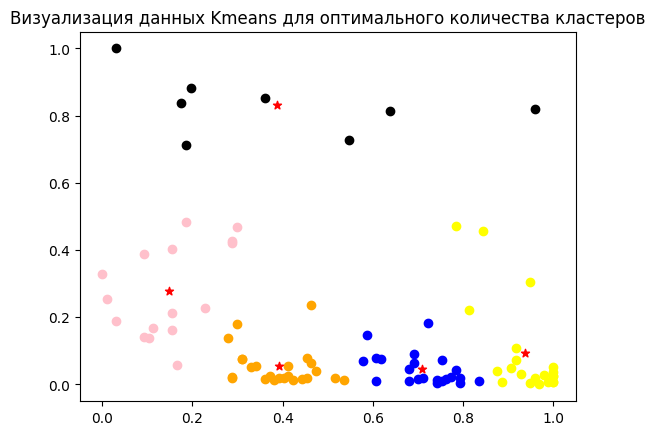

In [15]:
OptimalK = 5
km = Kmeans()
km.basics(normX, normXY,  0.01, OptimalK)
centroids = km.centroids

colors = ['black', 'yellow', 'blue', 'orange', 'pink', 'green']

def PrintData(datasetXY, labels, centersSet, colorsSet):
    for i in range(len(labels)):
        plt.scatter(normX[i], normY[i], c=colorsSet[labels[i]])
    plt.scatter(centersSet[:, 0], centersSet[:, 1], marker = '*', c='r')
    plt.title("Визуализация данных Kmeans для оптимального количества кластеров")
    plt.show()
    
PrintData(dataXY, km.labels, centroids, colors)

Каждый кластер - свой цвет, центройды обозначены красным цветом.

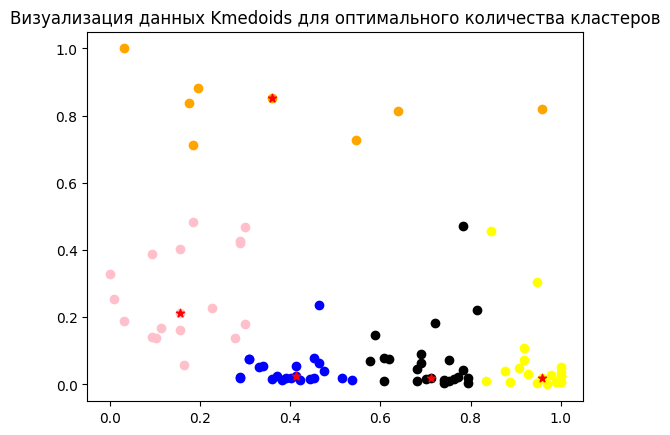

In [16]:
kmdO = Kmedoids()
kmdO.basicsM(normX, normXY, OptimalK)
centroidsX = [kmdO.centroids[:][i][0] for i in range(len(kmdO.centroids))]
centroidsY = [kmdO.centroids[:][i][1] for i in range(len(kmdO.centroids))]


colors = ['black', 'yellow', 'blue', 'orange', 'pink', 'green']

def PrintDataN(datasetXY, labels, centersSetX, centersSetY, colorsSet):
    for i in range(len(labels)):
        plt.scatter(normX[i], normY[i], c=colorsSet[labels[i]])
    plt.scatter(centroidsX, centroidsY, marker = '*', c='r')
    plt.title("Визуализация данных Kmedoids для оптимального количества кластеров")
    plt.show()
    
PrintDataN(dataXY, kmdO.labels, centroidsX, centroidsY, colors)

Каждый кластер - свой цвет, центройды обозначены красным цветом.

## Номер 7

In [34]:
def FindR(dataXYset):
    
    minD = -1
    maxD = 0
    #print(round(len(dataXYset)/2))
    
    for i in range(round(len(dataXYset))):
        for j in range(len(dataXYset)):
            
            drange = np.sqrt((dataXYset[i][0] - dataXYset[j][0])**2 + (dataXYset[i][1] - dataXYset[j][1])**2)
            
            if(drange>=maxD):
                maxD = drange
            if((minD==-1 or drange<minD) and (drange!=0)):
                minD = drange
    #print(minD, maxD)
    return [round((np.abs(minD - maxD)*0.2),4), round((np.abs(minD - maxD)*0.3),4), round((np.abs(minD - maxD)*0.5),4)]
    
    
Radius = FindR(normXY)   
print("Возьмем 3 радиуса для кластеров: ", Radius)

all_colors = [k for k,v in pltc.cnames.items()]
colors = sample(all_colors,20)

Возьмем 3 радиуса для кластеров:  [0.2774, 0.4161, 0.6936]


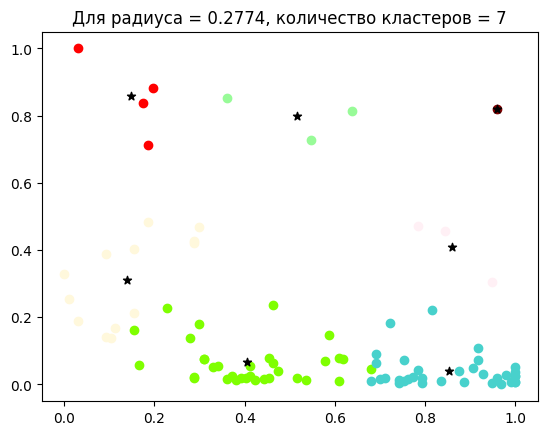

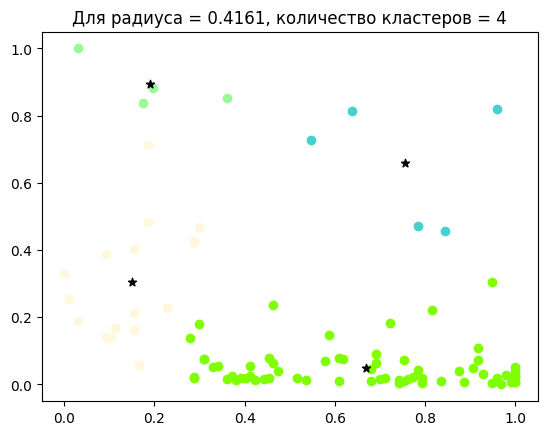

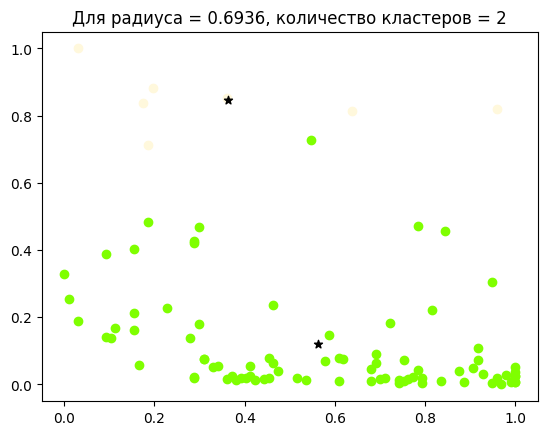

    Значение R Центроид кластера  Объем кластера
0       0.2774       [0.4, 0.07]              33
1       0.2774      [0.14, 0.31]              13
2       0.2774      [0.85, 0.04]              34
3       0.2774       [0.52, 0.8]               3
4       0.2774      [0.15, 0.86]               4
5       0.2774      [0.96, 0.82]               1
6       0.2774      [0.86, 0.41]               3
7       0.4161      [0.67, 0.05]              65
8       0.4161      [0.15, 0.31]              17
9       0.4161      [0.75, 0.66]               5
10      0.4161      [0.19, 0.89]               4
11      0.6936      [0.56, 0.12]              84
12      0.6936      [0.36, 0.85]               7


In [35]:

def MetOfSearchThick(dataXYset, RadiusSet):
    u = dataXYset
    Labels = []
    Centroids = []
    while len(u) > 0:
        centroid = np.random.choice(len(u))
        centroid = u[centroid]
        #print("len u ", len(u))
        #print("centroid", centroid)
        
        while True:
            k = [x for x in u if (np.sqrt((x[0] - centroid[0])**2 + (x[1] - centroid[1])**2) <= RadiusSet)]
            #print("len k = ", len(k))
            
            new_center = [0, 0]
            for x in k:
                new_center = (new_center[0] + x[0], new_center[1] + x[1])
            #print("new_center before", new_center)
            new_center =  [new_center[0]/len(k), new_center[1]/len(k)]
            #print("centroid", centroid)
            #print("new_center", new_center)
            distance = np.sqrt((new_center[0] - centroid[0])**2 + (new_center[1] - centroid[1])**2) 
            #print("distance", distance)
            
            
            
            if(distance>0.01): #(np.sqrt((new_center[0] - centroid[0])**2 + (new_center[1] - centroid[1])**2) < 0.01 ) is False:
                #print("if")
                centroid = new_center
            else:
                #print("else")
                Labels += [k]
                Centroids += [centroid]
                u = [x for x in u if(np.sqrt((x[0] - centroid[0])**2 + (x[1] - centroid[1])**2)  > RadiusSet) ] #[i for i in u if i not in k]
                #print("new u = ",u)
                
                break
        
                
    return (Labels, Centroids)

def PrintFOREL(LabelsSet, CentroidsSet, colorsSet):
    
    for i in range(len(CentroidsSet)):
        for j in range(len(LabelsSet[i])):
            plt.scatter(LabelsSet[i][j][0], LabelsSet[i][j][1], c=colorsSet[i])
        plt.scatter(CentroidsSet[i][0], CentroidsSet[i][1], marker = '*', c = 'black')
    plt.show()

    

FORELInfo = pd.DataFrame(columns=["Значение R", "Центроид кластера", "Объем кластера"])

for r in Radius:     
    Labels, Centroids = MetOfSearchThick(normXY, r)
    for i in range(len(Centroids)):
        FORELInfo.loc[len(FORELInfo)] = [r, np.round(Centroids[i], 2), len(Labels[i])]
    
    plt.title(f"Для радиуса = {r}, количество кластеров = {len(Centroids)}")
    PrintFOREL(Labels, Centroids, colors)

    
print(FORELInfo)

## Номер 8

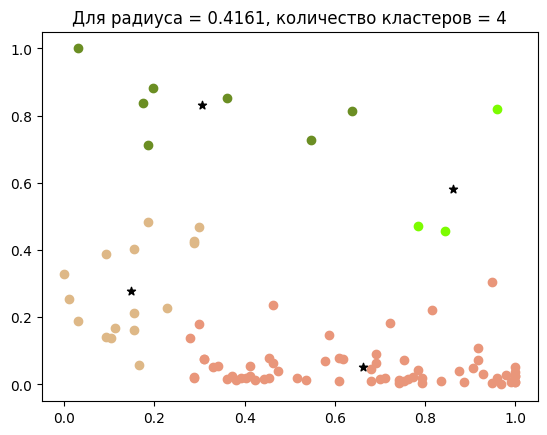

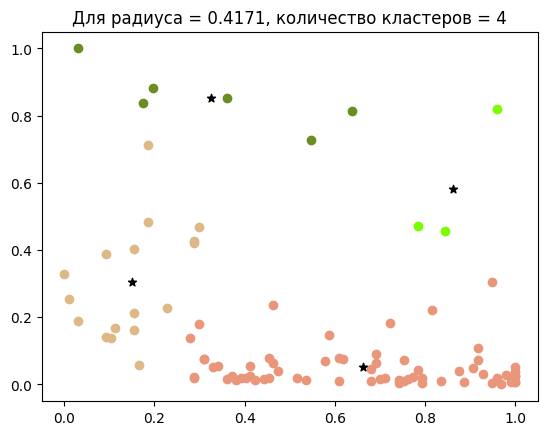

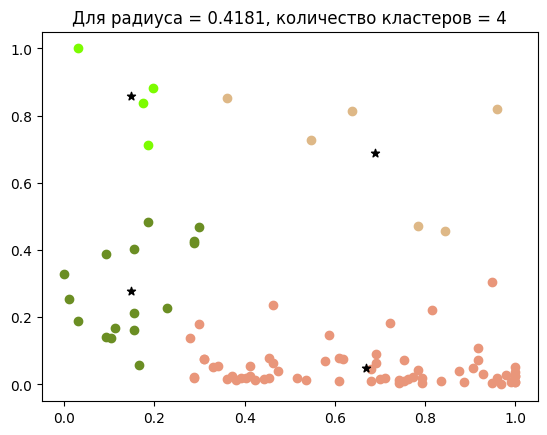

    Значение R Центроид кластера  Объем кластера
0       0.4161      [0.66, 0.05]              65
1       0.4161      [0.15, 0.28]              16
2       0.4161       [0.3, 0.83]               7
3       0.4161      [0.86, 0.58]               3
4       0.4171      [0.66, 0.05]              65
5       0.4171      [0.15, 0.31]              17
6       0.4171      [0.32, 0.85]               6
7       0.4171      [0.86, 0.58]               3
8       0.4181      [0.67, 0.05]              65
9       0.4181      [0.69, 0.69]               6
10      0.4181      [0.15, 0.28]              16
11      0.4181      [0.15, 0.86]               4


In [36]:
Radius = [0.4161, 0.4171, 0.4181]
all_colors = [k for k,v in pltc.cnames.items()]
colors = sample(all_colors,20)

FORELInfo = pd.DataFrame(columns=["Значение R", "Центроид кластера", "Объем кластера"])


for r in Radius:     
    Labels, Centroids = MetOfSearchThick(normXY, r)
    
    for i in range(len(Centroids)):
        FORELInfo.loc[len(FORELInfo)] = [r, np.round(Centroids[i], 2), len(Labels[i])]
    
    plt.title(f"Для радиуса = {r}, количество кластеров = {len(Centroids)}")
    PrintFOREL(Labels, Centroids, colors)
print(FORELInfo)

Каждый кластер - свой цвет, центройды обозначены черным цветом.

В данном случае можно увидеть, что алгоритм очень чувстителен к погрешностям, что обусловлено случайным выбором центройдов.

## Номер 9

Алгоритмы KMeans и Kmedoids похожи друг на друга, по сути отличаясь только форматом вывода центров кластеров.
Алгоритм поиска сгущений является более гибким алгоритмом, позволяющим отделить не только кластеры заданного радиуса, а также одиночный шум. Однако он очень чувстителен к погрешностям, что, наверное, можно решить фиксацией первоначального выбора центройдов кластеров.
Из за разницы размаха осей, все алгоритмы разбили исходные данные на 'слои' по оси ординат.

## Выводы

В ходе работы были освоены некоторые методы кластерного анализа, в частности, метода KMeans, KMedoids и метод поиска сгущений.
Была получена оценка оптимального количества кластеров при помощи метода локтя. Реализован метод поиска сгущений и проверен на чувстительность.
Был проведен сравнительный анализ всех алгоритмов между собой.